In [5]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objs as go
from sklearn import datasets
from dash.dependencies import Input, Output, State
import base64
import io
import zipfile
import pandas as pd

# Load dataset of handwritten digits
#digits = datasets.load_digits()
from PIL import Image
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

# Set path to directory containing folders of images
dir_path = "Number"

# Set image dimensions
height = 28
width = 28

# Load images into NumPy array
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    #print(tva)
    return tva

image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = [imageprepare(os.path.join(folder_path, filename))]

                # Append image array to list with label
                image_data.append((image, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)

#adjust form to other#
image_df = pd.DataFrame(image_data, columns = ['data', 'target'])
df_form = pd.DataFrame(image_df.data)
df_form['col1'] = df_form['data'].apply(lambda x: str(x[0]))
df_form = df_form['col1'].str.slice(1, -1).str.split(',', expand=True)
display(df_form)


#EDA

# Load digits dataset from sklearn
digits = pd.DataFrame(image_data, columns = ['data', 'target'])
digits.target = digits.target.astype('int')
#display(digits)
digits_df = pd.DataFrame({'Number': range(10), 'Frequency': [list(digits.target).count(str(i)) for i in range(10)]})

#Bar Plot
# Count the frequency of each digit in the dataset
digit_counts = np.bincount(digits.target)

# Create a bar chart with different x-axis colors for each number
data = [go.Bar(
            x=list(range(10)),
            y=digit_counts,
            marker=dict(
                color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#FDFD96', '#A9A9A9', '#48C9B0', '#1F618D']
            )
        )]

layout = go.Layout(
    title='Frequency of Digits in Dataset',
    xaxis=dict(title='Digit', tickmode='array', tickvals=list(digits_df['Number'])),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)

#Pie
# Count frequency of digits
digit_counts = {str(i): list(digits.target).count(i) for i in range(10)}

# Sort count frequencies by number
sorted_counts = sorted(digit_counts.items(), key=lambda x: x[0], reverse=False)

# Create graph data
pie_graph_data = {
    'labels': [count[0] for count in sorted_counts],
    'values': [count[1] for count in sorted_counts],
    'sort': False
}
fig_p = {'data': [{'labels': pie_graph_data['labels'], 'values': pie_graph_data['values'], 'type': 'pie', 'sort': False}],
        'layout': {'title': 'Pie Graph'}}
        
#Supported Input Types
ALLOWED_TYPES = ("text", )

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(className="bg-white-200 items-center p-2",			
			children=[
				#-- table
				html.Div(className="grid grid-cols-1 rounded-md shadow p-6 rounded-lg bg-gray-50 items-center text-center ",
							children=[

								html.Div(
    [
        dcc.Input(
            id="input_{}".format(_),
            type=_,
            placeholder="input type {}".format(_),
        )
        for _ in ALLOWED_TYPES
    ]
    + [html.Div(id="out-all-types")]
)							
							]
					),
				
				html.Div(className='grid grid-cols-3 gap-4 p-4 items-center',
						# -- grid
						children=[							
							# -- box 1
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='bar-graph'),
										dcc.Graph(
                                            id='bar-graph',
                                            figure= fig
                                        ) # -- end graph
									]
									),	
							# -- box 2
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='pie-graph'),
										dcc.Graph(
                                            id='pie-graph',
                                            figure= fig_p
                                        )  # -- end graph
									]
									),
															
							]) # -- end of grid
				])

@app.callback(
    Output("out-all-types", "children"),
    [Input("input_{}".format(_), "value") for _ in ALLOWED_TYPES],
)
def cb_render(*vals):
    return " | ".join((str(val) for val in vals if val))

# Run app
if __name__ == '__main__':
    app.run_server()

C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\541129203.py:47: DeprecationWarning:

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.

C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\541129203.py:70: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [4]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objs as go
from sklearn import datasets
from dash.dependencies import Input, Output, State
import base64
import io
import zipfile
import pandas as pd

# Load dataset of handwritten digits
#digits = datasets.load_digits()
from PIL import Image
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

# Set path to directory containing folders of images
dir_path = "Number"

# Set image dimensions
height = 28
width = 28

# Load images into NumPy array
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    #print(tva)
    return tva

image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = [imageprepare(os.path.join(folder_path, filename))]

                # Append image array to list with label
                image_data.append((image, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)

#EDA

# Load digits dataset from sklearn
digits = pd.DataFrame(image_data, columns = ['data', 'target'])
digits.target = digits.target.astype('int')
#display(digits)
digits_df = pd.DataFrame({'Number': range(10), 'Frequency': [list(digits.target).count(str(i)) for i in range(10)]})

#Bar Plot
# Count the frequency of each digit in the dataset
digit_counts = np.bincount(digits.target)

# Create a bar chart with different x-axis colors for each number
data = [go.Bar(
            x=list(range(10)),
            y=digit_counts,
            marker=dict(
                color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#FDFD96', '#A9A9A9', '#48C9B0', '#1F618D']
            )
        )]

layout = go.Layout(
    title='Frequency of Digits in Dataset',
    xaxis=dict(title='Digit', tickmode='array', tickvals=list(digits_df['Number'])),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)

#Pie
# Count frequency of digits
digit_counts = {str(i): list(digits.target).count(i) for i in range(10)}

# Sort count frequencies by number
sorted_counts = sorted(digit_counts.items(), key=lambda x: x[0], reverse=False)

# Create graph data
pie_graph_data = {
    'labels': [count[0] for count in sorted_counts],
    'values': [count[1] for count in sorted_counts],
    'sort': False
}
fig_p = {'data': [{'labels': pie_graph_data['labels'], 'values': pie_graph_data['values'], 'type': 'pie', 'sort': False}],
        'layout': {'title': 'Pie Graph'}}


# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(className="bg-white-200 items-center p-2",			
			children=[
				#-- table
				html.Div(className="grid grid-cols-1 rounded-md shadow p-6 rounded-lg bg-gray-50 items-center text-center ",
							children=[

								html.Table(children=[
									dcc.Upload(
                                        id='upload-data',
                                        children=html.Div([
                                            html.A('Select Zip File')
                                        ]),
                                        style={
                                            'width': '100%',
                                            'height': '60px',
                                            'lineHeight': '60px',
                                            'borderWidth': '1px',
                                            'borderStyle': 'dashed',
                                            'borderRadius': '5px',
                                            'textAlign': 'center',
                                            'margin': '10px'
                                        },
                                        multiple=False
                                    ),
                                    html.Div(id='output-data-upload'),
                                    
                                    ])

							
							]
					),
				
				html.Div(className='grid grid-cols-3 gap-4 p-4 items-center',
						# -- grid
						children=[							
							# -- box 1
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='bar-graph'),
										dcc.Graph(
                                            id='bar-graph',
                                            figure= fig
                                        ) # -- end graph
									]
									),	
							# -- box 2
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='pie-graph'),
										dcc.Graph(
                                            id='pie-graph',
                                            figure= fig_p
                                        )  # -- end graph
									]
									),
															
							]) # -- end of grid
				])

@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'))
def parse_contents(contents, filename):
    #content_type, content_string = contents.split(',')
    print(contents)

    #zip_file = zipfile.ZipFile(io.BytesIO(base64.b64decode(content_string)))
    #file_names = zip_file.namelist()
    #display(file_names)

    # Extract zip file contents to a temporary directory
    #temp_dir = 'temp/'
    #zip_file.extractall(temp_dir)    

    # Process the extracted images and return the result
    # Here you can add your machine learning code to process the images

    # Return the result as a string
    return None
    #html.Div([
        ##html.H5(filename),
        #html.H5('Number of images: {}'.format(len(file_names)))
    #])
def update_output(contents, filename):
    if contents is not None:
        children = [
            parse_contents(contents, filename)
        ]
        return children

# Run app
if __name__ == '__main__':
    app.run_server()

C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\372387609.py:47: DeprecationWarning:

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\372387609.py:70: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [27]:
from dash import Dash, dcc, html, Input, Output, callback

app = Dash(__name__)

ALLOWED_TYPES = ("text", )

app.layout = html.Div(
    [
        dcc.Input(
            id="input_{}".format(_),
            type=_,
            placeholder="input type {}".format(_),
        )
        for _ in ALLOWED_TYPES
    ]
    + [html.Div(id="out-all-types")]
)


@callback(
    Output("out-all-types", "children"),
    [Input("input_{}".format(_), "value") for _ in ALLOWED_TYPES],
)
def cb_render(*vals):
    return " | ".join((str(val) for val in vals if val))


if __name__ == "__main__":
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Jun/2023 22:05:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:50] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:50] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:50] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:50] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:05:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2023 22:06:10] "POST /_dash-update-component HTTP/1.1" 200 -


In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objs as go
from sklearn import datasets
from dash.dependencies import Input, Output, State
import base64
import io
import zipfile
import pandas as pd

# Load dataset of handwritten digits
#digits = datasets.load_digits()
from PIL import Image
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

# Set path to directory containing folders of images
dir_path = "Number"

# Set image dimensions
height = 28
width = 28

# Load images into NumPy array
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    #print(tva)
    return tva

image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = [imageprepare(os.path.join(folder_path, filename))]

                # Append image array to list with label
                image_data.append((image, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)

#adjust form to other#
image_df = pd.DataFrame(image_data, columns = ['data', 'target'])
df_form = pd.DataFrame(image_df.data)
df_form['col1'] = df_form['data'].apply(lambda x: str(x[0]))
df_form = df_form['col1'].str.slice(1, -1).str.split(',', expand=True)
display(df_form)


#EDA

# Load digits dataset from sklearn
digits = pd.DataFrame(image_data, columns = ['data', 'target'])
digits.target = digits.target.astype('int')
#display(digits)
digits_df = pd.DataFrame({'Number': range(10), 'Frequency': [list(digits.target).count(str(i)) for i in range(10)]})

#Bar Plot
# Count the frequency of each digit in the dataset
digit_counts = np.bincount(digits.target)

# Create a bar chart with different x-axis colors for each number
data = [go.Bar(
            x=list(range(10)),
            y=digit_counts,
            marker=dict(
                color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#FDFD96', '#A9A9A9', '#48C9B0', '#1F618D']
            )
        )]

layout = go.Layout(
    title='Frequency of Digits in Dataset',
    xaxis=dict(title='Digit', tickmode='array', tickvals=list(digits_df['Number'])),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)

#Pie
# Count frequency of digits
digit_counts = {str(i): list(digits.target).count(i) for i in range(10)}

# Sort count frequencies by number
sorted_counts = sorted(digit_counts.items(), key=lambda x: x[0], reverse=False)

# Create graph data
pie_graph_data = {
    'labels': [count[0] for count in sorted_counts],
    'values': [count[1] for count in sorted_counts],
    'sort': False
}
fig_p = {'data': [{'labels': pie_graph_data['labels'], 'values': pie_graph_data['values'], 'type': 'pie', 'sort': False}],
        'layout': {'title': 'Pie Graph'}}
        
#Supported Input Types
ALLOWED_TYPES = ("text", )

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(className="bg-white-200 items-center p-2",			
			children=[
				#-- table
				html.Div(className="grid grid-cols-1 rounded-md shadow p-6 rounded-lg bg-gray-50 items-center text-center ",
							children=[

								html.Div(
    [
        dcc.Input(
            id="input_{}".format(_),
            type=_,
            placeholder="input type {}".format(_),
        )
        for _ in ALLOWED_TYPES
    ]
    + [html.Div(id="out-all-types")]
)							
							]
					),
				
				html.Div(className='grid grid-cols-3 gap-4 p-4 items-center',
						# -- grid
						children=[							
							# -- box 1
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='bar-graph'),
										dcc.Graph(
                                            id='bar-graph',
                                            figure= fig
                                        ) # -- end graph
									]
									),	
							# -- box 2
							html.Div(className="rounded-md shadow p-6 rounded-lg bg-gray-50 p-1.5",
									children=[
										html.Div(className="text-lg font-bold",
											children='pie-graph'),
										dcc.Graph(
                                            id='pie-graph',
                                            figure= fig_p
                                        )  # -- end graph
									]
									),
															
							]) # -- end of grid
				])

@app.callback(
    Output("out-all-types", "children"),
    [Input("input_{}".format(_), "value") for _ in ALLOWED_TYPES],
)
def cb_render(*vals):
    return " | ".join((str(val) for val in vals if val))

# Run app
if __name__ == '__main__':
    app.run_server()

C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\541129203.py:47: DeprecationWarning:

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.

C:\Users\tanat\AppData\Local\Temp\ipykernel_23252\541129203.py:70: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jun/2023 09:46:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:47] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:52] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:52] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:52] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 09:46:52] "GET /_dash-component-sui

In [14]:
from PIL import Image
import numpy as np
import os

# Set path to directory containing folders of images
dir_path = "Number"

# Set image dimensions
height = 28
width = 28

# Load images into NumPy array
image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = Image.open(os.path.join(folder_path, filename))

                # Convert image to grayscale
                image = image.convert("L")

                # Resize image to desired dimensions
                image = image.resize((width, height))

                # Convert image to NumPy array
                image_array = np.asarray(image)

                # Append image array to list with label
                image_data.append((image_array, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)

print(image_data.shape)

display(image_data[240, 1])
display(image_data[240, 0])

(400, 2)


C:\Users\tanat\AppData\Local\Temp\ipykernel_17784\3633069420.py:35: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



'6'

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

6


<function matplotlib.pyplot.show(close=None, block=None)>

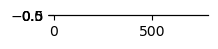

In [66]:
import matplotlib.pyplot as plt

# Display image
img = image_data[240][0]
print(image_data[240][1])
plt.figure(figsize = (2, 2))
plt.imshow(img, cmap = plt.cm.gray)
plt.show

In [63]:
image_data[240][1]

'6'

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

# Set path to directory containing folders of images
dir_path = "Number"

# Set image dimensions
height = 28
width = 28

# Load images into NumPy array
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    #print(tva)
    return tva

image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = [imageprepare(os.path.join(folder_path, filename))]

                # Append image array to list with label
                image_data.append((image, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)
image_df = pd.DataFrame(image_data, columns = ['data', 'target'])
image_df.target = image_df.target.astype('int')
digits_df = pd.DataFrame({'Number': range(10), 'Frequency': [list(image_df.target).count(i) for i in range(10)]})
digits_df



C:\Users\tanat\AppData\Local\Temp\ipykernel_12888\2216891113.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
C:\Users\tanat\AppData\Local\Temp\ipykernel_12888\2216891113.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_data = np.array(image_data)


,Number,Frequency
0,0,40
1,1,40
2,2,40
3,3,40
4,4,40
5,5,40
6,6,40
7,7,40
8,8,40
9,9,40


In [14]:
df_form = pd.DataFrame(image_df.data)
df_form['col1'] = df_form['data'].apply(lambda x: str(x[0]))
df_form = df_form['col1'].str.slice(1, -1).str.split(',', expand=True)

df_form


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
import pandas as pd

# Create a sample dataframe with a text column
data = [['John,Doe,25', 'Jane,Smith,30', 'Bob,Jones,40']]
df = pd.DataFrame(data)
display(df)
# Split the text column into three separate columns
df = df[2].str.split(',', expand=True)

# Print the updated dataframe
display(df)

,0,1,2
0,"John,Doe,25","Jane,Smith,30","Bob,Jones,40"


,0,1,2
0,Bob,Jones,40


In [136]:
df2 = pd.DataFrame(i[0:][0], columns = [i for i in range(784)])
df2.head(100)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    print(tva)
    return tva

In [1]:
import os
import base64
import io
import numpy as np
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from PIL import Image, ImageFilter
import plotly.graph_objs as go

# Set image dimensions
dir_path = "Number" #Default
height = 28
width = 28

# Load images into NumPy array
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width > height:
        nheight = int(round((20 / width*height), 0))
        if (nheight == 0):
            nheight = 1
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20 / width*height), 0))
        if (nwidth == 0):
            nwidth = 1
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))
        newImage.paste(img, (wleft, 4))

    tv = list(newImage.getdata())
    
    tva = [(255 - x) * 1 / 255 for x in tv]
    #print(tva)
    return tva
    
#defalut
dir_path = "Number"
image_data = []
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                # Load image with Pillow
                image = [imageprepare(os.path.join(folder_path, filename))]

                # Append image array to list with label
                image_data.append((image, foldername))

# Convert list of image arrays to NumPy array
image_data = np.array(image_data)

# Define Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and drop or click to select files'
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        multiple=True
    ),
    html.Div(id='output-data'),
    dcc.Graph(id='digit-counts')
])

# Define callback to preprocess uploaded files
@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'))
def preprocess_images(contents, filename):
    content_type, content_string = contents.split(',')
    zip_file = zipfile.ZipFile(io.BytesIO(base64.b64decode(content_string)))
    file_names = zip_file.namelist()
    print(file_names)
    # Extract zip file contents to a temporary directory
    temp_dir = 'temp/'
    zip_file.extractall(temp_dir)    

    if contents is not None:
        # Decode and preprocess images
        images = []
        for content in contents:
            content_type, content_string = content.split(',')
            decoded = base64.b64decode(content_string)
            image = Image.open(io.BytesIO(decoded))
            image_array = np.array([imageprepare(image)])
            images.append(image_array)
        # Convert list of image arrays to NumPy array
        image_data = np.concatenate(images)
        # Load digits dataset from NumPy array
        digits = pd.DataFrame(image_data, columns = ['data'])
        # Extract digit labels from filenames
        filenames = [content.split(',')[1].split(';')[0].split('=')[1] for content in contents]
        digits['target'] = [int(os.path.splitext(filename)[0]) for filename in filenames]
        # Return data summary
        return html.Div([
            html.H4('Preprocessed Data Summary'),
            html.P('Number of images: {}'.format(len(image_data))),
            html.P('Image dimensions: {}x{}'.format(height, width)),
            html.P('Number of digits: {}'.format(len(digits))),
            html.P('Number of unique digits: {}'.format(len(digits['target'].unique()))),
        ])

# Define callback to display digit frequency
@app.callback(Output('digit-counts', 'figure'),
              Input('output-data', 'children'))
def display_digit_counts(summary):
    if summary is not None:
        # Count the frequency of each digit in the dataset
        digit_counts = np.bincount(digits['target'])
        # Create a bar chart with different x-axis colors for each number
        data = [go.Bar(
            x=list(range(10)),
            y=digit_counts,
            marker=dict(
                color=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#FDFD96', '#A9A9A9', '#48C9B0', '#1F618D']))]
        layout = go.Layout(
            title='Frequency of Digits in Dataset',
            xaxis=dict(title='Digit', tickmode='array', tickvals=list(range(10))),
            yaxis=dict(title='Frequency'))
        fig = go.Figure(data=data, layout=layout)
        return fig

# Run app
if __name__ == '__main__':
    app.run_server()

C:\Users\tanat\AppData\Local\Temp\ipykernel_17784\307418977.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\tanat\AppData\Local\Temp\ipykernel_17784\307418977.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\tanat\AppData\Local\Temp\ipykernel_17784\307418977.py:36: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
C:\Users\tanat\AppData\Local\Temp\ipykernel_17784\307418977.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is dep

NameError: name 'State' is not defined

In [ ]:
@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'))
def parse_contents(contents, filename):
    content_type, content_string = contents.split(',')

    zip_file = zipfile.ZipFile(io.BytesIO(base64.b64decode(content_string)))
    file_names = zip_file.namelist()
    print(file_names)

    # Extract zip file contents to a temporary directory
    temp_dir = 'temp/'
    zip_file.extractall(temp_dir)

    

    # Process the extracted images and return the result
    # Here you can add your machine learning code to process the images

    # Return the result as a string
    return html.Div([
        html.H5(filename),
        html.H5('Number of images: {}'.format(len(file_names))),
        html.P('Result: ...')
    ])
def update_output(contents, filename):
    if contents is not None:
        children = [
            parse_contents(contents, filename)
        ]
        return children